In [52]:
# https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C
import mglearn, sys, os, sklearn, math

from IPython.display import display
from scipy import sparse

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d

import seaborn as sns
import pandas as pd
import numpy as np
import graphviz

from sklearn.datasets import (load_breast_cancer,
                              load_boston,
                              make_blobs,
                              make_moons,
                              make_circles,
                              load_iris,
                              fetch_lfw_people,
                              load_digits)
from mglearn.datasets import make_wave, make_forge, load_extended_boston

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     KFold, LeaveOneOut,
                                     ShuffleSplit,
                                     GroupKFold,
                                     GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,
                                   OneHotEncoder, PolynomialFeatures)
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (confusion_matrix,
                             f1_score, classification_report,
                             precision_recall_curve, average_precision_score,
                             roc_curve, roc_auc_score, accuracy_score)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [2]:
#cross-validation

In [3]:
iris = load_iris()
logreg = LogisticRegression(max_iter=10000)
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print(scores)
print(scores.mean())

[0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]
0.9669140383426098


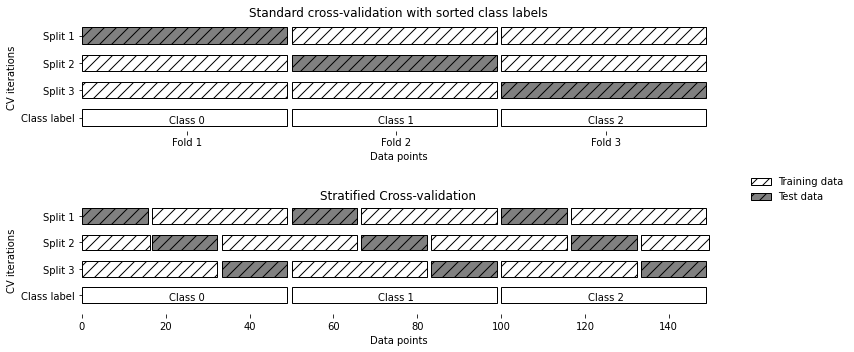

In [4]:
mglearn.plots.plot_stratified_cross_validation()

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kf)
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [6]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(len(scores))
print(scores.mean())

150
0.9666666666666667


In [7]:
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(scores)
print(scores.mean())

[0.96       0.96       0.96       0.96       0.92       0.97333333
 0.97333333 0.93333333 0.98666667 0.98666667]
0.9613333333333334


In [8]:
gkf = GroupKFold(n_splits=3)
x, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, x, y, groups=groups, cv=gkf)
print(scores)
print(scores.mean())

[0.75       0.6        0.66666667]
0.6722222222222222


In [9]:
# grid search

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state=1)
print('Size of training set: {}. Size of test set: {}.'.format(xtrain.shape[0], xtest.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(xtrain, ytrain)
        score = svm.score(xtest, ytest)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(best_score)
print(best_parameters)

Size of training set: 112. Size of test set: 38.
0.9736842105263158
{'C': 100, 'gamma': 0.001}


In [11]:
xtrainval, xtest, ytrainval, ytest = train_test_split(iris.data, iris.target, random_state=1)
xtrain, xval, ytrain, yval = train_test_split(xtrainval, ytrainval, random_state=2)
print('Size of training set: {}. Size of test set: {}. Size of validation set: {}.'.format(xtrain.shape[0],
                                                                                           xtest.shape[0],
                                                                                           xval.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(xtrain, ytrain)
        score = svm.score(xval, yval)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(xtrainval, ytrainval)
test_score = svm.score(xtest, ytest)
print(best_score)
print(best_parameters)
print(test_score)

Size of training set: 84. Size of test set: 38. Size of validation set: 28.
0.9642857142857143
{'C': 100, 'gamma': 0.001}
0.9736842105263158


In [12]:
# grid search w/cross-validation 8)
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(xtrain, ytrain)
        scores = cross_val_score(svm, xtrainval, ytrainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(xtrainval, ytrainval)
print(best_score)
print(best_parameters)

0.9731225296442687
{'C': 100, 'gamma': 0.001}


In [13]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [14]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state=1)
grid_search.fit(xtrain, ytrain)
print(grid_search.score(xtest, ytest))

0.9736842105263158


In [15]:
print(grid_search.best_estimator_)

SVC(C=10, gamma=0.01)


In [16]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.01}


In [17]:
print(grid_search.set_params)

<bound method BaseEstimator.set_params of GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})>


In [18]:
print(grid_search.scorer_)

<function _passthrough_scorer at 0x7f765f6f3130>


In [19]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00047274, 0.00041947, 0.00037975, 0.00040298, 0.00037761,
       0.00046   , 0.00037475, 0.0003727 , 0.00042577, 0.00039468,
       0.00045099, 0.0004694 , 0.000384  , 0.00037036, 0.00034442,
       0.00036497, 0.00042582, 0.00048304, 0.00041084, 0.00030265,
       0.00024419, 0.0003108 , 0.00045552, 0.00055304, 0.00030189,
       0.0002634 , 0.00023527, 0.00028963, 0.00051785, 0.00053115,
       0.00025668, 0.00025101, 0.00022917, 0.00032315, 0.00046506,
       0.00056052]), 'std_fit_time': array([1.22074541e-04, 4.46546224e-05, 5.29353679e-06, 5.27321103e-05,
       4.36612058e-06, 5.42439942e-05, 7.24321765e-06, 4.27135385e-06,
       6.09465045e-05, 1.26560523e-05, 7.98673914e-05, 8.46892863e-06,
       1.04834794e-05, 7.13760084e-06, 1.57360597e-05, 2.88383607e-05,
       6.36578499e-05, 3.77274331e-06, 5.77834172e-05, 1.09720220e-05,
       3.32899278e-06, 2.87618593e-05, 1.08929898e-05, 3.42014256e-05,
       8.81104238e-06, 3.59471338e-05, 1.23751875e

In [20]:
res = pd.DataFrame(grid_search.cv_results_)
display(res.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.000473      0.000122         0.000200        0.000030   0.001   
1       0.000419      0.000045         0.000207        0.000039   0.001   
2       0.000380      0.000005         0.000178        0.000002   0.001   
3       0.000403      0.000053         0.000190        0.000019   0.001   
4       0.000378      0.000004         0.000178        0.000002   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}           0.347826   
1        0.01   {'C': 0.001, 'gamma': 0.01}           0.347826   
2         0.1    {'C': 0.001, 'gamma': 0.1}           0.347826   
3           1      {'C': 0.001, 'gamma': 1}           0.347826   
4          10     {'C': 0.001, 'gamma': 10}           0.347826   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.347826           0.363636           0.363636           0.409091   
1           0.347826           0.363636           0.363636           0.409091   
2           0.347826           0.363636           0.363636           0.409091   
3           0.347826           0.363636           0.363636           0.409091   
4           0.347826           0.363636           0.363636           0.409091   

   mean_test_score  std_test_score  rank_test_score  
0         0.366403        0.022485               23  
1         0.366403        0.022485               23  
2         0.366403        0.022485               23  
3         0.366403        0.022485               23  
4         0.366403        0.022485               23

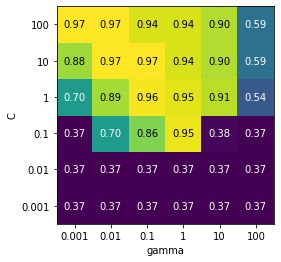

In [21]:
scores = np.array(res.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

In [22]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [23]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.982213438735178
{'C': 1, 'kernel': 'linear'}


In [24]:
res = pd.DataFrame(grid_search.cv_results_)
display(res.T)

0   \
mean_fit_time                                           0.000417   
std_fit_time                                            0.000044   
mean_score_time                                         0.000189   
std_score_time                                          0.000018   
param_C                                                    0.001   
param_gamma                                                0.001   
param_kernel                                                 rbf   
params             {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
split0_test_score                                       0.347826   
split1_test_score                                       0.347826   
split2_test_score                                       0.363636   
split3_test_score                                       0.363636   
split4_test_score                                       0.409091   
mean_test_score                                         0.366403   
std_test_score                                          0.022485   
rank_test_score                                               28   

                                                             1   \
mean_fit_time                                          0.000366   
std_fit_time                                           0.000004   
mean_score_time                                        0.000177   
std_score_time                                         0.000004   
param_C                                                   0.001   
param_gamma                                                0.01   
param_kernel                                                rbf   
params             {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}   
split0_test_score                                      0.347826   
split1_test_score                                      0.347826   
split2_test_score                                      0.363636   
split3_test_score                                      0.363636   
split4_test_score                                      0.409091   
mean_test_score                                        0.366403   
std_test_score                                         0.022485   
rank_test_score                                              28   

                                                            2   \
mean_fit_time                                         0.000387   
std_fit_time                                          0.000016   
mean_score_time                                       0.000176   
std_score_time                                        0.000002   
param_C                                                  0.001   
param_gamma                                                0.1   
param_kernel                                               rbf   
params             {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}   
split0_test_score                                     0.347826   
split1_test_score                                     0.347826   
split2_test_score                                     0.363636   
split3_test_score                                     0.363636   
split4_test_score                                     0.409091   
mean_test_score                                       0.366403   
std_test_score                                        0.022485   
rank_test_score                                             28   

                                                          3   \
mean_fit_time                                       0.000415   
std_fit_time                                        0.000056   
mean_score_time                                      0.00018   
std_score_time                                      0.000004   
param_C                                                0.001   
param_gamma                                                1   
param_kernel                                             rbf   
params             {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}   
split0_test_score                                   0.347826   
sp

In [25]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5, n_jobs=4),
                         iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.9        0.96666667 1.        ]
0.9666666666666668


In [26]:
digits = load_digits()
y = digits.target == 9
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, y, random_state=1)
dummy_maj = DummyClassifier(strategy='most_frequent').fit(xtrain, ytrain)
pred_most_freq = dummy_maj.predict(xtest)
print(np.unique(pred_most_freq))
print(dummy_maj.score(xtest, ytest))

[False]
0.8933333333333333


In [27]:
tree = DecisionTreeClassifier(max_depth=2).fit(xtrain, ytrain)
pred_tree = tree.predict(xtest)
print(tree.score(xtest, ytest))

0.9311111111111111


In [28]:
logreg = LogisticRegression(C=0.1, max_iter=10000).fit(xtrain, ytrain)
pred_logreg = logreg.predict(xtest)
confusion = confusion_matrix(ytest, pred_logreg)
print(confusion)

[[401   1]
 [  4  44]]


In [29]:
print(confusion_matrix(ytest, pred_most_freq))

[[402   0]
 [ 48   0]]


In [30]:
print(confusion_matrix(ytest, pred_tree))

[[382  20]
 [ 11  37]]


In [31]:
f1_score(ytest, pred_most_freq)

0.0

In [32]:
f1_score(ytest, pred_logreg)

0.946236559139785

In [33]:
f1_score(ytest, pred_tree)

0.7047619047619048

In [34]:
print(classification_report(ytest, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       402
        nine       0.98      0.92      0.95        48

    accuracy                           0.99       450
   macro avg       0.98      0.96      0.97       450
weighted avg       0.99      0.99      0.99       450



In [35]:
x, y = make_blobs(n_samples=(400, 50), centers=[(1, 2), (2, 3)], cluster_std=[7.0, 2], random_state=23)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1)
svc = SVC(gamma=0.5).fit(xtrain, ytrain)
y_low_thres = svc.decision_function(xtest) > -0.8

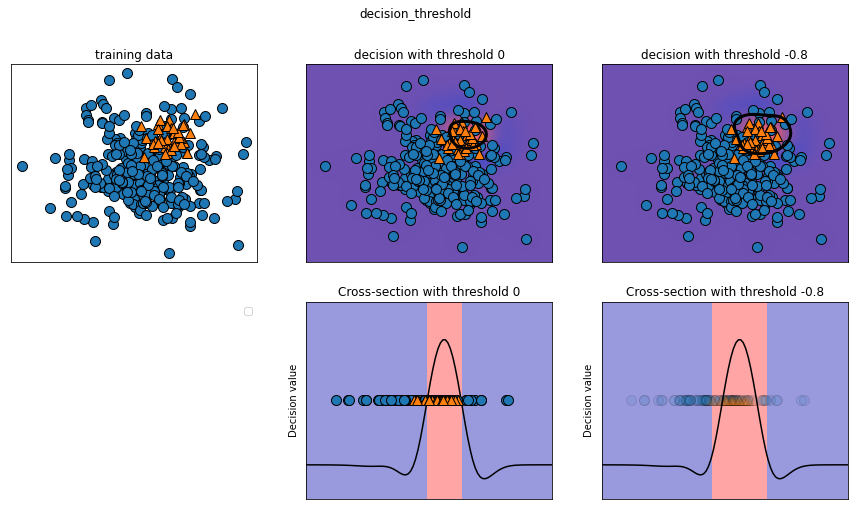

In [36]:
mglearn.plots.plot_decision_threshold()

In [37]:
print(classification_report(ytest, svc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       102
           1       0.50      0.18      0.27        11

    accuracy                           0.90       113
   macro avg       0.71      0.58      0.61       113
weighted avg       0.88      0.90      0.88       113



In [38]:
print(classification_report(ytest, y_low_thres))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       102
           1       0.37      0.64      0.47        11

    accuracy                           0.86       113
   macro avg       0.66      0.76      0.69       113
weighted avg       0.90      0.86      0.87       113



In [39]:
# more true positives and more false positives by decreasing threshold

Text(0, 0.5, 'recall')

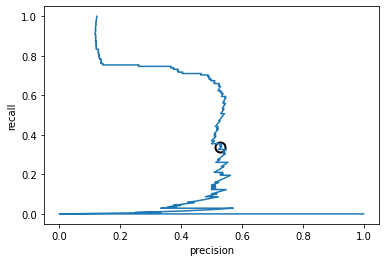

In [40]:
x, y = make_blobs(n_samples=(4000, 500), centers=[(1, 2), (2, 3)],
                  cluster_std=[7.0, 2], random_state=23)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1)
svc = SVC(gamma=0.5).fit(xtrain, ytrain)
precision, recall, thresholds = precision_recall_curve(ytest, svc.decision_function(xtest))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='prc')
plt.xlabel('precision')
plt.ylabel('recall')

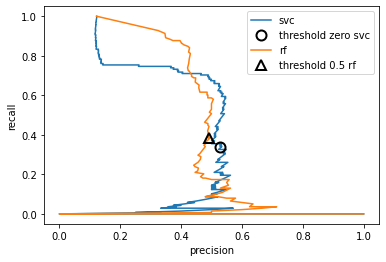

In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(xtrain, ytrain)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest,
                                                                rf.predict_proba(xtest)[:, 1])
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero svc', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10,
         label='threshold 0.5 rf', fillstyle='none', c='k', mew=2)
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')

In [42]:
average_precision_score(ytest, rf.predict_proba(xtest)[:, 1])

0.4509620069777931

In [43]:
average_precision_score(ytest, svc.decision_function(xtest))

0.4145732738569909

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, svc.decision_function(xtest))

plt.plot(fpr, tpr, label='roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr (recall)')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

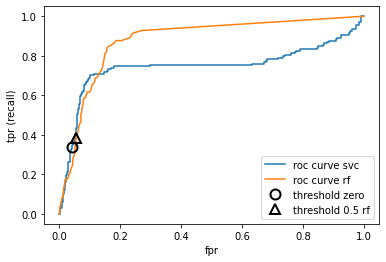

In [46]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, rf.predict_proba(xtest)[:, 1])

plt.plot(fpr, tpr, label='roc curve svc')
plt.plot(fpr_rf, tpr_rf, label='roc curve rf')
plt.xlabel('fpr')
plt.ylabel('tpr (recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)

close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_zero_rf], tpr_rf[close_zero_rf], '^', markersize=10,
         label='threshold 0.5 rf', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [48]:
rf_auc = roc_auc_score(ytest, rf.predict_proba(xtest)[:, 1])
svc_auc = roc_auc_score(ytest, svc.decision_function(xtest))
print(rf_auc)
print(svc_auc)

0.8782836292086986
0.7457233895716783


In [53]:
digits = load_digits()
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=1)
lr = LogisticRegression(max_iter=10000).fit(xtrain, ytrain)
pred = lr.predict(xtest)
print(accuracy_score(ytest, pred))
print(confusion_matrix(ytest, pred))

0.9688888888888889
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  1  2  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  1  0  1  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  1  0 46  0  0]
 [ 0  0  0  0  0  2  0  0 35  0]
 [ 0  0  0  1  0  1  0  0  1 45]]


In [54]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        41
           3       0.96      0.94      0.95        52
           4       0.96      1.00      0.98        47
           5       0.90      0.92      0.91        39
           6       1.00      1.00      1.00        43
           7       0.98      0.96      0.97        48
           8       0.92      0.95      0.93        37
           9       0.98      0.94      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [55]:
print(f1_score(ytest, pred, average='micro'))
print(f1_score(ytest, pred, average='macro'))

0.9688888888888889
0.9679928061478957


In [56]:
default_scoring = cross_val_score(SVC(), digits.data, digits.target == 9)
accuracy_scoring = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy')
roc_auc_scoring = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')

In [57]:
print(default_scoring)
print(accuracy_scoring)
print(roc_auc_scoring)

[0.975      0.99166667 1.         0.99442897 0.98050139]
[0.975      0.99166667 1.         0.99442897 0.98050139]
[0.99717078 0.99854252 1.         0.999828   0.98400413]


In [61]:
digits = load_digits()
xtrain, xtest, ytrain, ytest = train_test_split(digits.data,
                                                digits.target == 9,
                                                random_state=10)
params = {'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=params)
grid.fit(xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

{'gamma': 0.001}
0.9940575519757676


In [62]:
roc_auc_scoring_grid = roc_auc_score(ytest, grid.decision_function(xtest))
print(roc_auc_scoring_grid)
print(grid.score(xtest, ytest))

0.9997964272990991
0.9933333333333333


In [63]:
grid_roc = GridSearchCV(SVC(), param_grid=params, scoring='roc_auc')
grid_roc.fit(xtrain, ytrain)
print(grid_roc.best_params_)
print(grid_roc.best_score_)

{'gamma': 0.01}
0.9977686030391286


In [64]:
roc_auc_scoring_grid_roc = roc_auc_score(ytest, grid_roc.decision_function(xtest))
print(roc_auc_scoring_grid_roc)
print(grid_roc.score(xtest, ytest))

0.99872767061937
0.99872767061937


In [65]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s